In [30]:
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import torch

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor
from vol_predict.loss.loss import Loss

from vol_predict.models.dl.transformer_predictor import TransformerPredictor as Model
from vol_predict.models.dl.lstm_softplus_predictor import (
    LSTMSoftplusPredictor as Baseline,
)

from run import run_backtest, initialize_sequential_runner

In [32]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.BITCOIN

model_params = ModelConfig()
baseline_params = ModelConfig()

model_params.n_features = 1200
model_params.n_unique_features = 10

# Handles the features
feature_processor = OneToOnePreprocessor()

runner = initialize_sequential_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Available data from 2018-06-04 23:00:00 to 2018-09-30 21:00:00


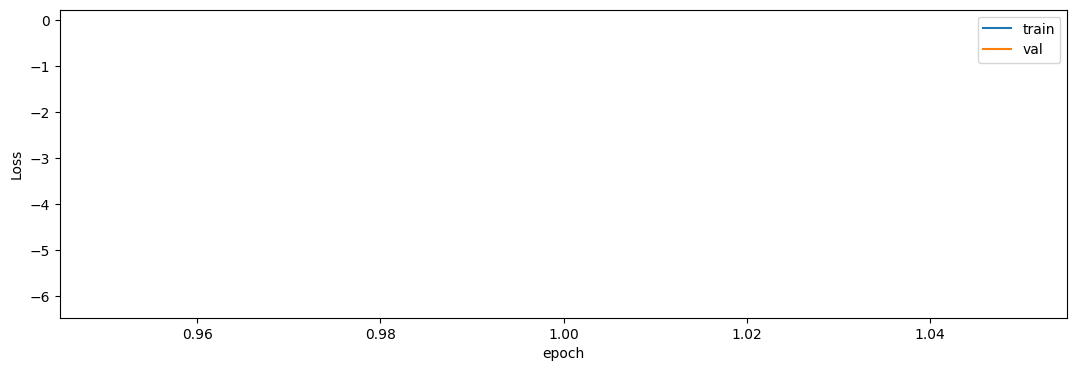

In [33]:
runner.model_config.lr = 1e-2
runner.model_config.n_epochs = 20
runner.model_config.hidden_size = 64
runner.model_config.n_layers = 3
runner.model_config.batch_size = 16
runner.model_config.optimizer = torch.optim.Adam
runner.model_config.loss = Loss.NLL
runner.model_config.dropout = 0.20

result = run_backtest(
    model_cls=Model,
    baseline_cls=Baseline,
    runner=runner,
)

In [34]:
result

,model_loss,baseline_loss,true_returns,true_vols,model_preds,baseline_preds
datetime,,,,,,
2018-06-30,1.570873,-8.636606,"[-0.0026883667, -0.004259642, 0.0017928587, 0....","[0.00041156381, 0.0004322233, 0.00021497025, 0...","[4.8109126, 4.811065, 4.8109546, 4.8109603, 4....","[0.00014757022, 0.00014935808, 0.00014935808, ..."
2018-07-05,2.854346,-6.611675,"[-0.0025450767, 0.0020725208, -0.0004954421, -...","[0.00021121168, 0.0001595019, 0.00016921855, 0...","[17.362907, 17.362885, 17.362915, 17.362959, 1...","[0.0013219913, 0.001330563, 0.0013273486, 0.00..."
2018-07-10,-0.664294,-9.640781,"[-0.0021792948, 0.0005109866, 0.00070048636, -...","[0.00016044531, 0.00012531331, 8.648752e-05, 7...","[0.51462185, 0.5146202, 0.514617, 0.5146169, 0...","[4.112636e-05, 4.112636e-05, 4.1007155e-05, 4...."
2018-07-15,-4.949611,-7.666046,"[0.00090926996, -0.00016162315, 0.0028238427, ...","[6.138905e-05, 4.4802924e-05, 8.2382474e-05, 5...","[0.007017371, 0.007017371, 0.007017371, 0.0070...","[0.00039402826, 0.00039378996, 0.00039414744, ..."
2018-07-20,-7.334387,-5.079943,"[0.0016087972, -0.0024853398, -0.004938002, -0...","[4.2298943e-05, 4.114835e-05, 7.0722686e-05, 0...","[0.00062243635, 0.00062243635, 0.00062243635, ...","[0.006195743, 0.0061879237, 0.006204984, 0.006..."
2018-07-25,-7.791250,-5.774243,"[-0.008449829, 0.0038263223, 0.004215324, 0.00...","[0.00024071828, 0.00015700524, 9.3138595e-05, ...","[0.00037245968, 0.00037245968, 0.00037245968, ...","[0.0030696914, 0.003084309, 0.0030594706, 0.00..."
2018-07-30,-5.266648,-8.773160,"[-0.002002476, -0.0008079753, -0.001266979, 0....","[2.0188261e-05, 1.9543379e-05, 2.5798885e-05, ...","[0.005109941, 0.0051095854, 0.005109704, 0.005...","[8.427742e-05, 8.487341e-05, 8.475421e-05, 8.4..."
2018-08-04,-8.752877,-5.884376,"[-0.0003308475, -0.0018424237, 0.0016508304, -...","[0.000100981226, 4.602776e-05, 4.093159e-05, 2...","[8.0105434e-05, 8.0105434e-05, 8.0105434e-05, ...","[0.0027235579, 0.0027261735, 0.0027281945, 0.0..."
2018-08-09,-8.423363,-6.016554,"[-0.0027170812, 0.0020420607, 0.0029039332, 0....","[3.1182026e-05, 4.331007e-05, 4.167312e-05, 8....","[9.8342825e-05, 9.8342825e-05, 9.8342825e-05, ...","[0.0023500703, 0.0023606548, 0.002355422, 0.00..."


In [35]:
from sklearn.metrics import root_mean_squared_error

rmse = []
for date, row in result.iterrows():
    rmse.append(
        [
            date,
            root_mean_squared_error(row.true_vols, row.model_preds),
            root_mean_squared_error(row.true_vols, row.baseline_preds),
        ]
    )

rmse = pd.DataFrame(rmse, columns=["date", "model", "baseline"]).set_index("date")

In [36]:
rmse.mean(axis=0)

model       1.199026
baseline    0.001088
dtype: float64

In [37]:
rmse.std(axis=0)

model       4.065888
baseline    0.001522
dtype: float64

In [38]:
result.to_csv(f"Daily_Transf_results_{runner.model_config.n_epochs}.csv")